## ПРОГНОЗИРОВАНИЕ И КОНТРОЛЬ РИСКА РАЗВИТИЯ СЕРДЕЧНО-СОСУДИСТЫХ ЗАБОЛЕВАНИЙ

Для прогнозирования риска в данной работе используются наиболее важные признаки в развитии сердечно-сосудистой патологии:

Возраст (Age),                                                                           Пол (Sex: Male/Female), 

Холестерин(Cholesterol),                                                                 Артериальное давление (Blood Pressure),

ЧСС (Heart Rate),                                                                        Наличие сахарного диабета(Diabetes:Yes/No), 

Семейная предрасположенность (Family History: Yes/No),                                   Курение (Smoking: Yes/No), 

Ожирение (Obesity: Yes/No),                                                              Употребление алкоголя (Alcohol Consumption:Yes/No), 

Дневная физическая активность (Exercise Hours Per Week),                                 Диета (Diet: Yes/No), 

Заболевания сердца в анамнезе (Previous Heart Problems: Yes/No),                         Прием лекарственных препаратов (Medication Use: Yes/No), 

Уровень стресса (Stress Level: Yes/No),                                                  Сидячий образ жизни (Sedentary Hours Per Day), 

Уровень дохода (Income),                                                                 ИМТ – индекс массы тела (BMI), 

Уровень триглицеридов (Triglycerides),                                                   Физическая активность в неделю (Physical Activity Days Per Week),

Сон (Sleep Hours Per Day),                                                               Страна (Country),

Континент (Continent),                                                                   Полушарие (Hemisphere),

Риск сердечного приступа (Heart Attack Risk: Yes/No)

## Цель: 

Создание усовершенствованного алгоритма оценки вероятности развития сердечно-сосудистых осложнений (ССО) у больных низкого/умеренного риска с использованием комплекса “классических” и “новых” факторов.

## Материал и методы:

Предоставлен набор данных, состоящий из 8763 записей пациентов со всего мира, с классическими факторами(неизменными) :пол, возраст и факторы, на которые можно воздействовать (остальные).

1. Подготовка данных 

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score

In [3]:
# загрузка материала по всем пациентам
df = pd.read_csv('prediction_dataset.csv', sep=',')

In [4]:
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
df.drop(columns=['Patient ID', 'Hemisphere'], inplace=True)

In [7]:
df['Country'].unique()

array(['Argentina', 'Canada', 'France', 'Thailand', 'Germany', 'Japan',
       'Brazil', 'South Africa', 'United States', 'Vietnam', 'China',
       'Italy', 'Spain', 'India', 'Nigeria', 'New Zealand', 'South Korea',
       'Australia', 'Colombia', 'United Kingdom'], dtype=object)

In [8]:
df['Continent'].unique()

array(['South America', 'North America', 'Europe', 'Asia', 'Africa',
       'Australia'], dtype=object)

In [9]:
df['Diet'].unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

In [10]:
# Преобразование категориальных признаков
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})

df['Diet'] = df['Diet'].map({'Healthy': 2, 'Average': 1, 'Unhealthy': 0})
df['Country'] = df['Country'].map({'Argentina': 0 ,'Canada':  1, 'France':2, 'Thailand': 3, 'Germany': 4, 'Japan': 5, 'Brazil': 6, 'South Africa': 7, 'United States': 8, 'Vietnam': 9, 'China': 10, 'Italy': 11, 'Spain': 12, 'India': 13, 'Nigeria': 14, 'New Zealand': 15, 'South Korea': 16, 'Australia': 17, 'Colombia': 18, 'United Kingdom': 19})
df['Continent'] = df['Continent'].map({'South America': 0, 'North America': 1, 'Europe': 2, 'Asia': 3, 'Africa': 4, 'Australia': 5})
df['Exercise Hours Per Week'] = df['Exercise Hours Per Week'].astype('int64')
df['Sedentary Hours Per Day'] = df['Sedentary Hours Per Day'].astype('int64')
df['BMI'] = df['BMI'].astype('int64')

In [11]:
# Разделение столбца Blood Pressure на два отдельных столбца
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)
# Преобразование новых столбцов в int
df['Systolic_BP'] = df['Systolic_BP'].astype('int64')
df['Diastolic_BP'] = df['Diastolic_BP'].astype('int64')

# Удаление старого столбца Blood Pressure
df.drop(columns=['Blood Pressure'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              8763 non-null   int64
 1   Sex                              8763 non-null   int64
 2   Cholesterol                      8763 non-null   int64
 3   Heart Rate                       8763 non-null   int64
 4   Diabetes                         8763 non-null   int64
 5   Family History                   8763 non-null   int64
 6   Smoking                          8763 non-null   int64
 7   Obesity                          8763 non-null   int64
 8   Alcohol Consumption              8763 non-null   int64
 9   Exercise Hours Per Week          8763 non-null   int64
 10  Diet                             8763 non-null   int64
 11  Previous Heart Problems          8763 non-null   int64
 12  Medication Use                   8763 non-null  

In [13]:
df.describe()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Heart Attack Risk,Systolic_BP,Diastolic_BP
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,0.302636,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,9.516262,...,158263.181901,28.395527,417.677051,3.489672,7.023508,9.427936,2.383088,0.358211,135.075659,85.156111
std,21.249509,0.459425,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.773164,...,80575.190806,6.318770,223.748137,2.282687,1.988473,5.810356,1.473070,0.479502,26.349976,14.676565
min,18.000000,0.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20062.000000,18.000000,30.000000,0.000000,4.000000,0.000000,0.000000,0.000000,90.000000,60.000000
25%,35.000000,0.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,...,88310.000000,23.000000,225.500000,2.000000,5.000000,4.000000,1.000000,0.000000,112.000000,72.000000
50%,54.000000,0.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.000000,...,157866.000000,28.000000,417.000000,3.000000,7.000000,9.000000,2.000000,0.000000,135.000000,85.000000
75%,72.000000,1.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,...,227749.000000,34.000000,612.000000,5.000000,9.000000,14.000000,3.000000,1.000000,158.000000,98.000000
max,90.000000,1.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,...,299954.000000,39.000000,800.000000,7.000000,10.000000,19.000000,5.000000,1.000000,180.000000,110.000000


В таблице представлено:

--- Из 8763 человек возраст от 18 до 90 лет, средний = 54.

--- Распределение по полу:  большинство пациентов - мужчины (около 70%).

--- Холестерин в диапазоне от 120 до 400, средний 259.

--- ЧСС в диапазоне от 40 до 110, средний = 75.

--- У 50% людей в группе есть сахарный диабет, имеют семейный анамнез.

--- 75% людей в группе  курят, страдают ожирением, употребляют алкоголь.

---Дневная физическая активность представлена в диапазоне от 0 до 19 часов, средний показатель = 9,5 часов.

--- Уровень дохода в диапазоне от 20062 до 299954, средний = 158263.

--- ИМТ в диапазоне от 18 до 39, среднний = 28 (что является уже предожирением).

--- Уровень триглицеридов в диапазоне от 30 до 800, средний = 418.

---Дни физической активности в неделю в диапазоне от 0 до 7, среднее = 3,5.

--- Сон в диапазоне от 4 до 10 часов, среднее = 7.

--- Риск сердечного приступа: вероятность,что будет: 64%, у кого нет - 36%.

--- Систолическое давление в диапазоне от 90 до 180, среднее - 135.

--- Диастолическое лавление в диапазоне от 60 до 110, среднее - 85.

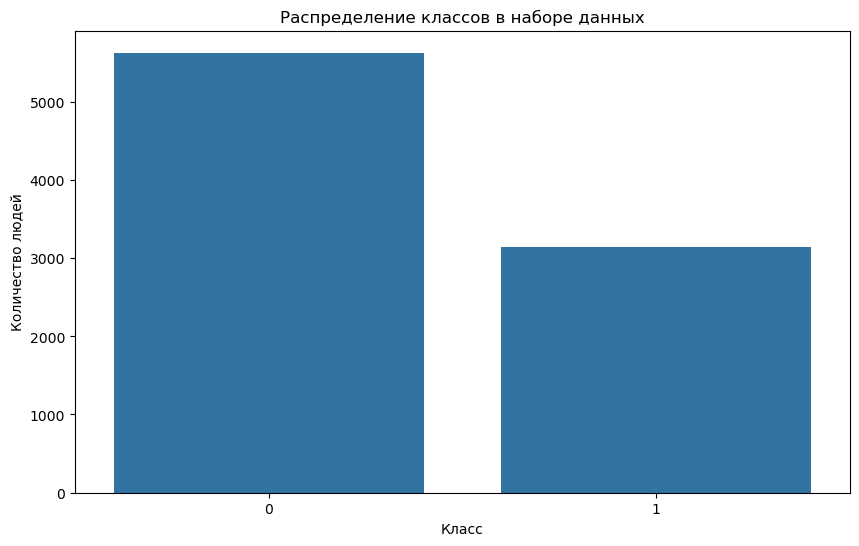

Процентное соотношение классов:
Heart Attack Risk
0    64.178934
1    35.821066
Name: proportion, dtype: float64


In [14]:
# Чтобы понять, как распределены данные в наборе данных и определить, нуждается ли он в балансировке, попробовала визуализировать их и просмотреть в  % соотношении.

target_column = 'Heart Attack Risk' 

# Распределение классов
class_distribution = df[target_column].value_counts()

# Визуализация распределения классов
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Класс')
plt.ylabel('Количество людей')
plt.title('Распределение классов в наборе данных')
plt.show()

# Вычисление процентного соотношения
class_percentage = df[target_column].value_counts(normalize=True) * 100
print('Процентное соотношение классов:')
print(class_percentage)

*** Значительная часть пациентов имеет такие факторы риска, как диабет, курение, ожирение и потребление алкоголя. Эти факторы буду акцентировать при разработке предсказательных моделей. Плюс пациенты имеют разный уровень физической активности и продолжительность сна, что также может влиять на риск сердечного приступа. 


In [15]:
# Разделение данных на признаки и целевую переменную
X = df.drop(columns=['Heart Attack Risk'])
y = df['Heart Attack Risk']

In [16]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [17]:
# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

interval columns not set, guessing: ['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Heart Attack Risk', 'Systolic_BP', 'Diastolic_BP']


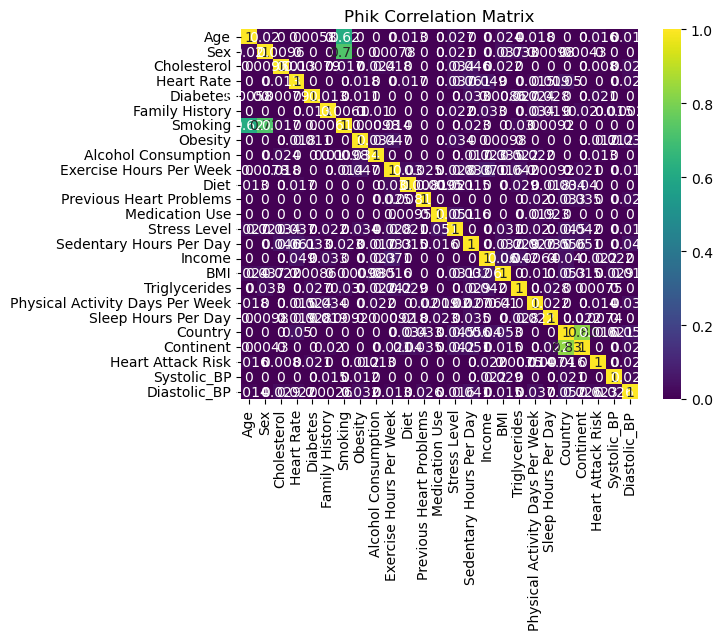

In [18]:
from phik import resources, report
from phik.report import plot_correlation_matrix
# Расчет Phik корреляции
phik_matrix = df.phik_matrix()

# Визуализация матрицы Phik корреляции
sns.heatmap(phik_matrix, annot=True, cmap='viridis')
plt.title('Phik Correlation Matrix')
plt.show()

In [19]:
df.phik_matrix()

interval columns not set, guessing: ['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Heart Attack Risk', 'Systolic_BP', 'Diastolic_BP']


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Heart Attack Risk,Systolic_BP,Diastolic_BP
Age,1.000000,0.019703,0.000000,0.000000,0.005777,0.000000,0.615217,0.000000,0.000000,0.000000,...,0.000000,0.023911,0.000000,0.017758,0.000000,0.000000,0.000000,0.015644,0.000000,0.013758
Sex,0.019703,1.000000,0.009569,0.000000,0.000000,0.000000,0.722863,0.000000,0.000000,0.007758,...,0.000000,0.036786,0.033188,0.000000,0.009796,0.000000,0.004348,0.000000,0.000000,0.000000
Cholesterol,0.000000,0.009569,1.000000,0.013405,0.000792,0.000000,0.016848,0.000000,0.023890,0.018415,...,0.000000,0.021558,0.000000,0.000000,0.000000,0.000000,0.000000,0.008027,0.000000,0.028966
Heart Rate,0.000000,0.000000,0.013405,1.000000,0.000000,0.000000,0.000000,0.018190,0.000000,0.000000,...,0.049006,0.000000,0.000000,0.014912,0.019226,0.050398,0.000000,0.000000,0.000000,0.022440
Diabetes,0.005777,0.000000,0.000792,0.000000,1.000000,0.013231,0.000000,0.010573,0.000000,0.000000,...,0.000000,0.008625,0.027382,0.023646,0.028210,0.000000,0.000000,0.020723,0.000000,0.000000
Family History,0.000000,0.000000,0.000000,0.000000,0.013231,1.000000,0.006131,0.000000,0.010101,0.000000,...,0.033142,0.000000,0.000000,0.033681,0.018984,0.000000,0.020336,0.000000,0.014994,0.002608
Smoking,0.615217,0.722863,0.016848,0.000000,0.000000,0.006131,1.000000,0.000000,0.009801,0.014077,...,0.000000,0.000000,0.030408,0.000000,0.009174,0.000000,0.000000,0.000000,0.000000,0.000000
Obesity,0.000000,0.000000,0.000000,0.018190,0.010573,0.000000,0.000000,1.000000,0.033688,0.047431,...,0.000000,0.009771,0.000000,0.000000,0.000000,0.000000,0.000000,0.011857,0.011903,0.032050
Alcohol Consumption,0.000000,0.000000,0.023890,0.000000,0.000000,0.010101,0.009801,0.033688,1.000000,0.000000,...,0.022747,0.034759,0.022064,0.021509,0.000000,0.000000,0.000000,0.013055,0.000000,0.000000
Exercise Hours Per Week,0.000000,0.007758,0.018415,0.000000,0.000000,0.000000,0.014077,0.047431,0.000000,1.000000,...,0.070841,0.015523,0.041618,0.000000,0.009171,0.000000,0.021195,0.000000,0.000000,0.013405


interval columns not set, guessing: ['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Heart Attack Risk', 'Systolic_BP', 'Diastolic_BP']


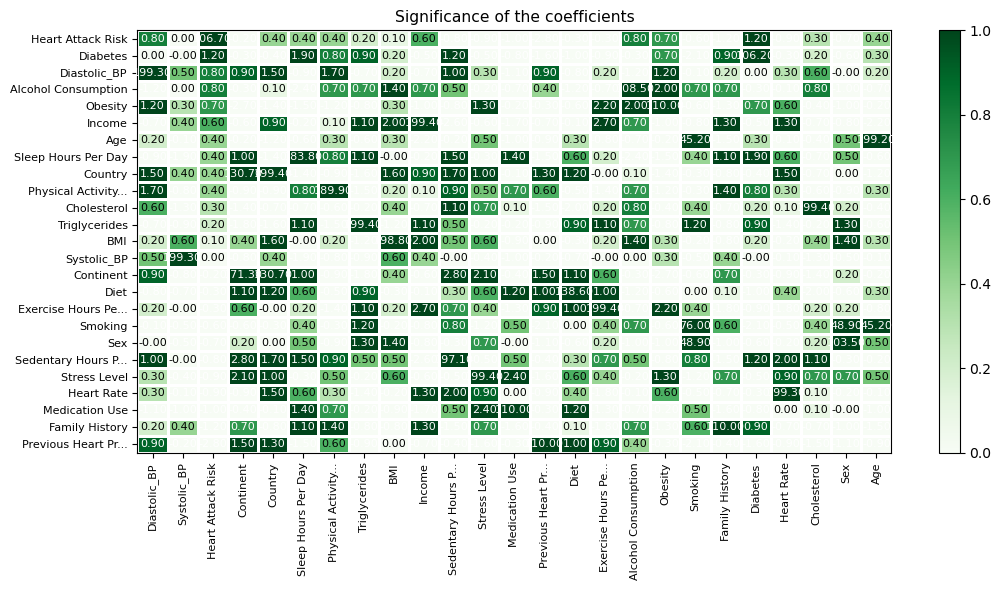

In [21]:
# Использование встроенных методов из phik для визуализации
significance_overview = df.significance_matrix().fillna(0).round(1).sort_values('Heart Attack Risk')
plot_correlation_matrix(significance_overview.values,
                        x_labels=significance_overview.columns,
                        y_labels=significance_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title="Significance of the coefficients",
                        usetex=False, fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

In [22]:
# Интерпретация значений
for col in phik_matrix.columns:
    for row in phik_matrix.index:
        value = phik_matrix.loc[row, col]
        if 0.7 <= value <= 1 and col != row:
            print(f"Сильная положительная корреляция между {row} и {col}: {value:.2f}")
        elif 0.3 <= value < 0.7 and col != row:
            print(f"Умеренная положительная корреляция между {row} и {col}: {value:.2f}")

Умеренная положительная корреляция между Smoking и Age: 0.62
Сильная положительная корреляция между Smoking и Sex: 0.72
Умеренная положительная корреляция между Age и Smoking: 0.62
Сильная положительная корреляция между Sex и Smoking: 0.72
Сильная положительная корреляция между Continent и Country: 0.83
Сильная положительная корреляция между Country и Continent: 0.83


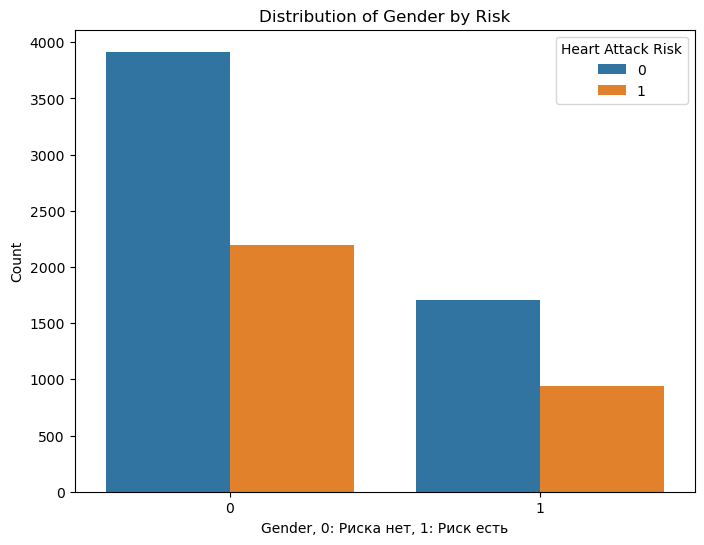

In [23]:
# Распределение пола от риска
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Heart Attack Risk', data=df)
plt.title('Distribution of Gender by Risk')
plt.xlabel('Gender, 0: Риска нет, 1: Риск есть')
plt.ylabel('Count')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10788\2631737903.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=df, x='Age', hue='Heart Attack Risk', multiple='stack', palette=custom_colors, kde=True, ax=axes[0, 0])
C:\Users\user\AppData\Local\Temp\ipykernel_10788\2631737903.py:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=df, x='Sex', hue='Heart Attack Risk', multiple='stack', palette=custom_colors, kde=False, ax=axes[0, 1])
C:\Users\user\AppData\Local\Temp\ipykernel_10788\2631737903.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=df, x='Cholesterol', hue='Heart Attack Risk', multiple='stack', palette= custom_colors, kde=True, ax=axes[1, 0])
C:\Users\user\AppData\Local\Temp\ipykernel_10788\2631737903.py:19: UserWarning: The palette list has more values (6) than needed (2), wh

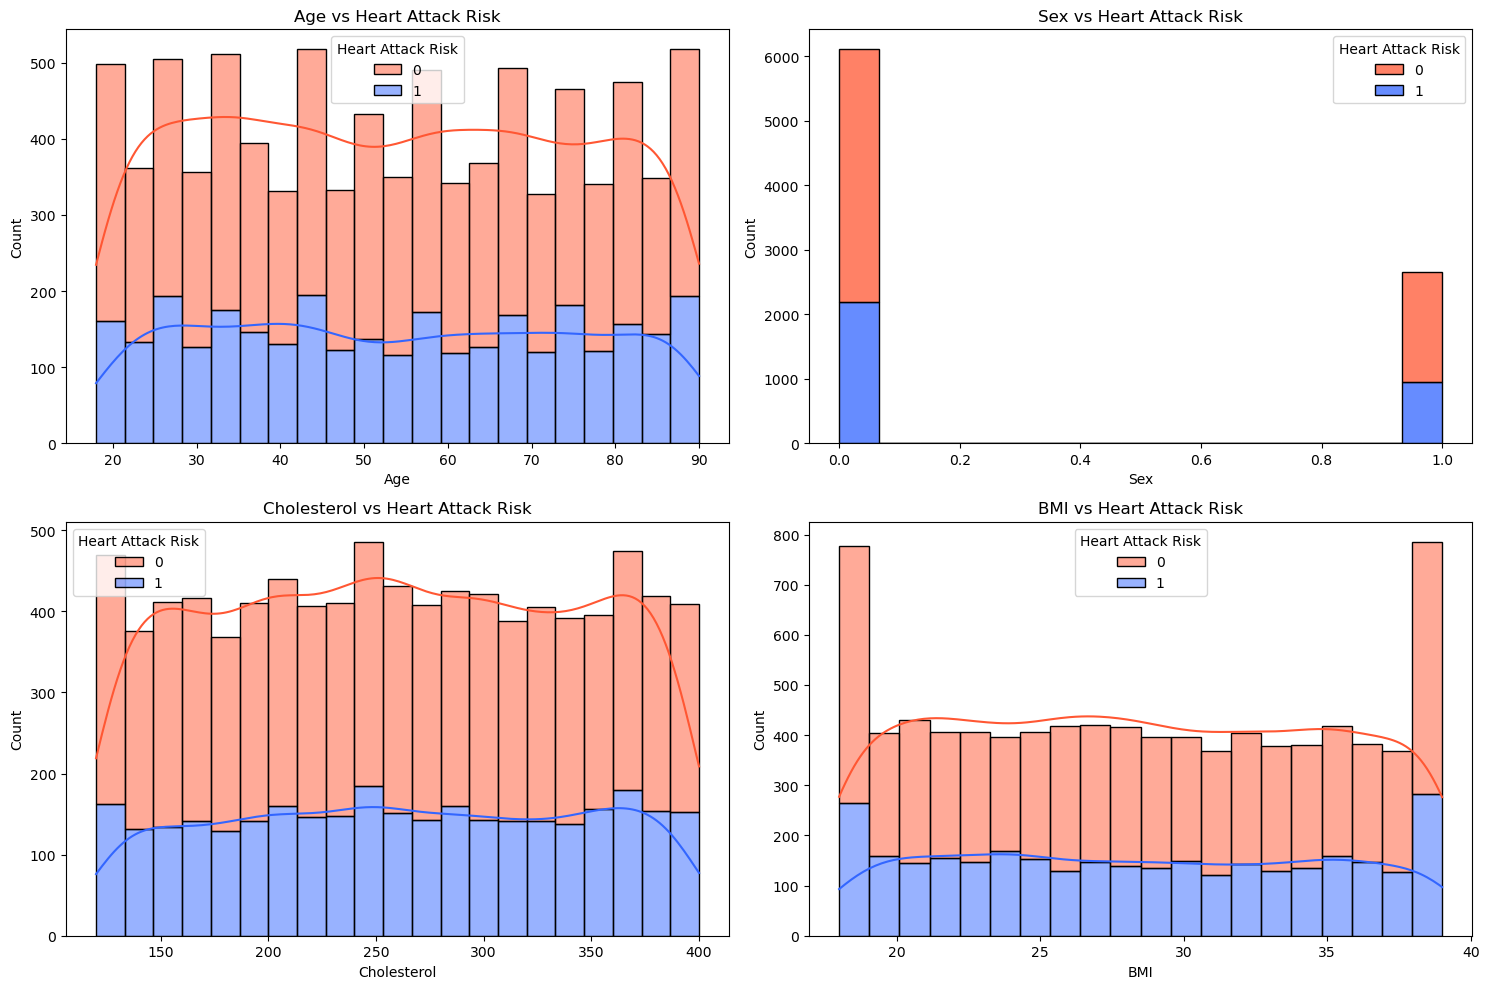

In [31]:
# Создание гистограммы

custom_colors = ["#FF5733", "#3366FF", "#33FF57", "#FF33FF", "#FFFF33", "#33FFFF"]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Гистограмма для Age
sns.histplot(data=df, x='Age', hue='Heart Attack Risk', multiple='stack', palette=custom_colors, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Heart Attack Risk')

# Гистограмма для Sex
sns.histplot(data=df, x='Sex', hue='Heart Attack Risk', multiple='stack', palette=custom_colors, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Sex vs Heart Attack Risk')

# Гистограмма для Cholesterol
sns.histplot(data=df, x='Cholesterol', hue='Heart Attack Risk', multiple='stack', palette= custom_colors, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol vs Heart Attack Risk')

# Гистограмма для BMI
sns.histplot(data=df, x='BMI', hue='Heart Attack Risk', multiple='stack', palette=custom_colors, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('BMI vs Heart Attack Risk')



plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10788\3355130046.py:24: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=df, x=feature, hue=target, multiple='stack', palette=custom_colors, kde=True, ax=axes[row, col])
C:\Users\user\AppData\Local\Temp\ipykernel_10788\3355130046.py:24: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=df, x=feature, hue=target, multiple='stack', palette=custom_colors, kde=True, ax=axes[row, col])
C:\Users\user\AppData\Local\Temp\ipykernel_10788\3355130046.py:24: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=df, x=feature, hue=target, multiple='stack', palette=custom_colors, kde=True, ax=axes[row, col])
C:\Users\user\AppData\Local\Temp\ipykernel_10788\3355130046.py:24: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns

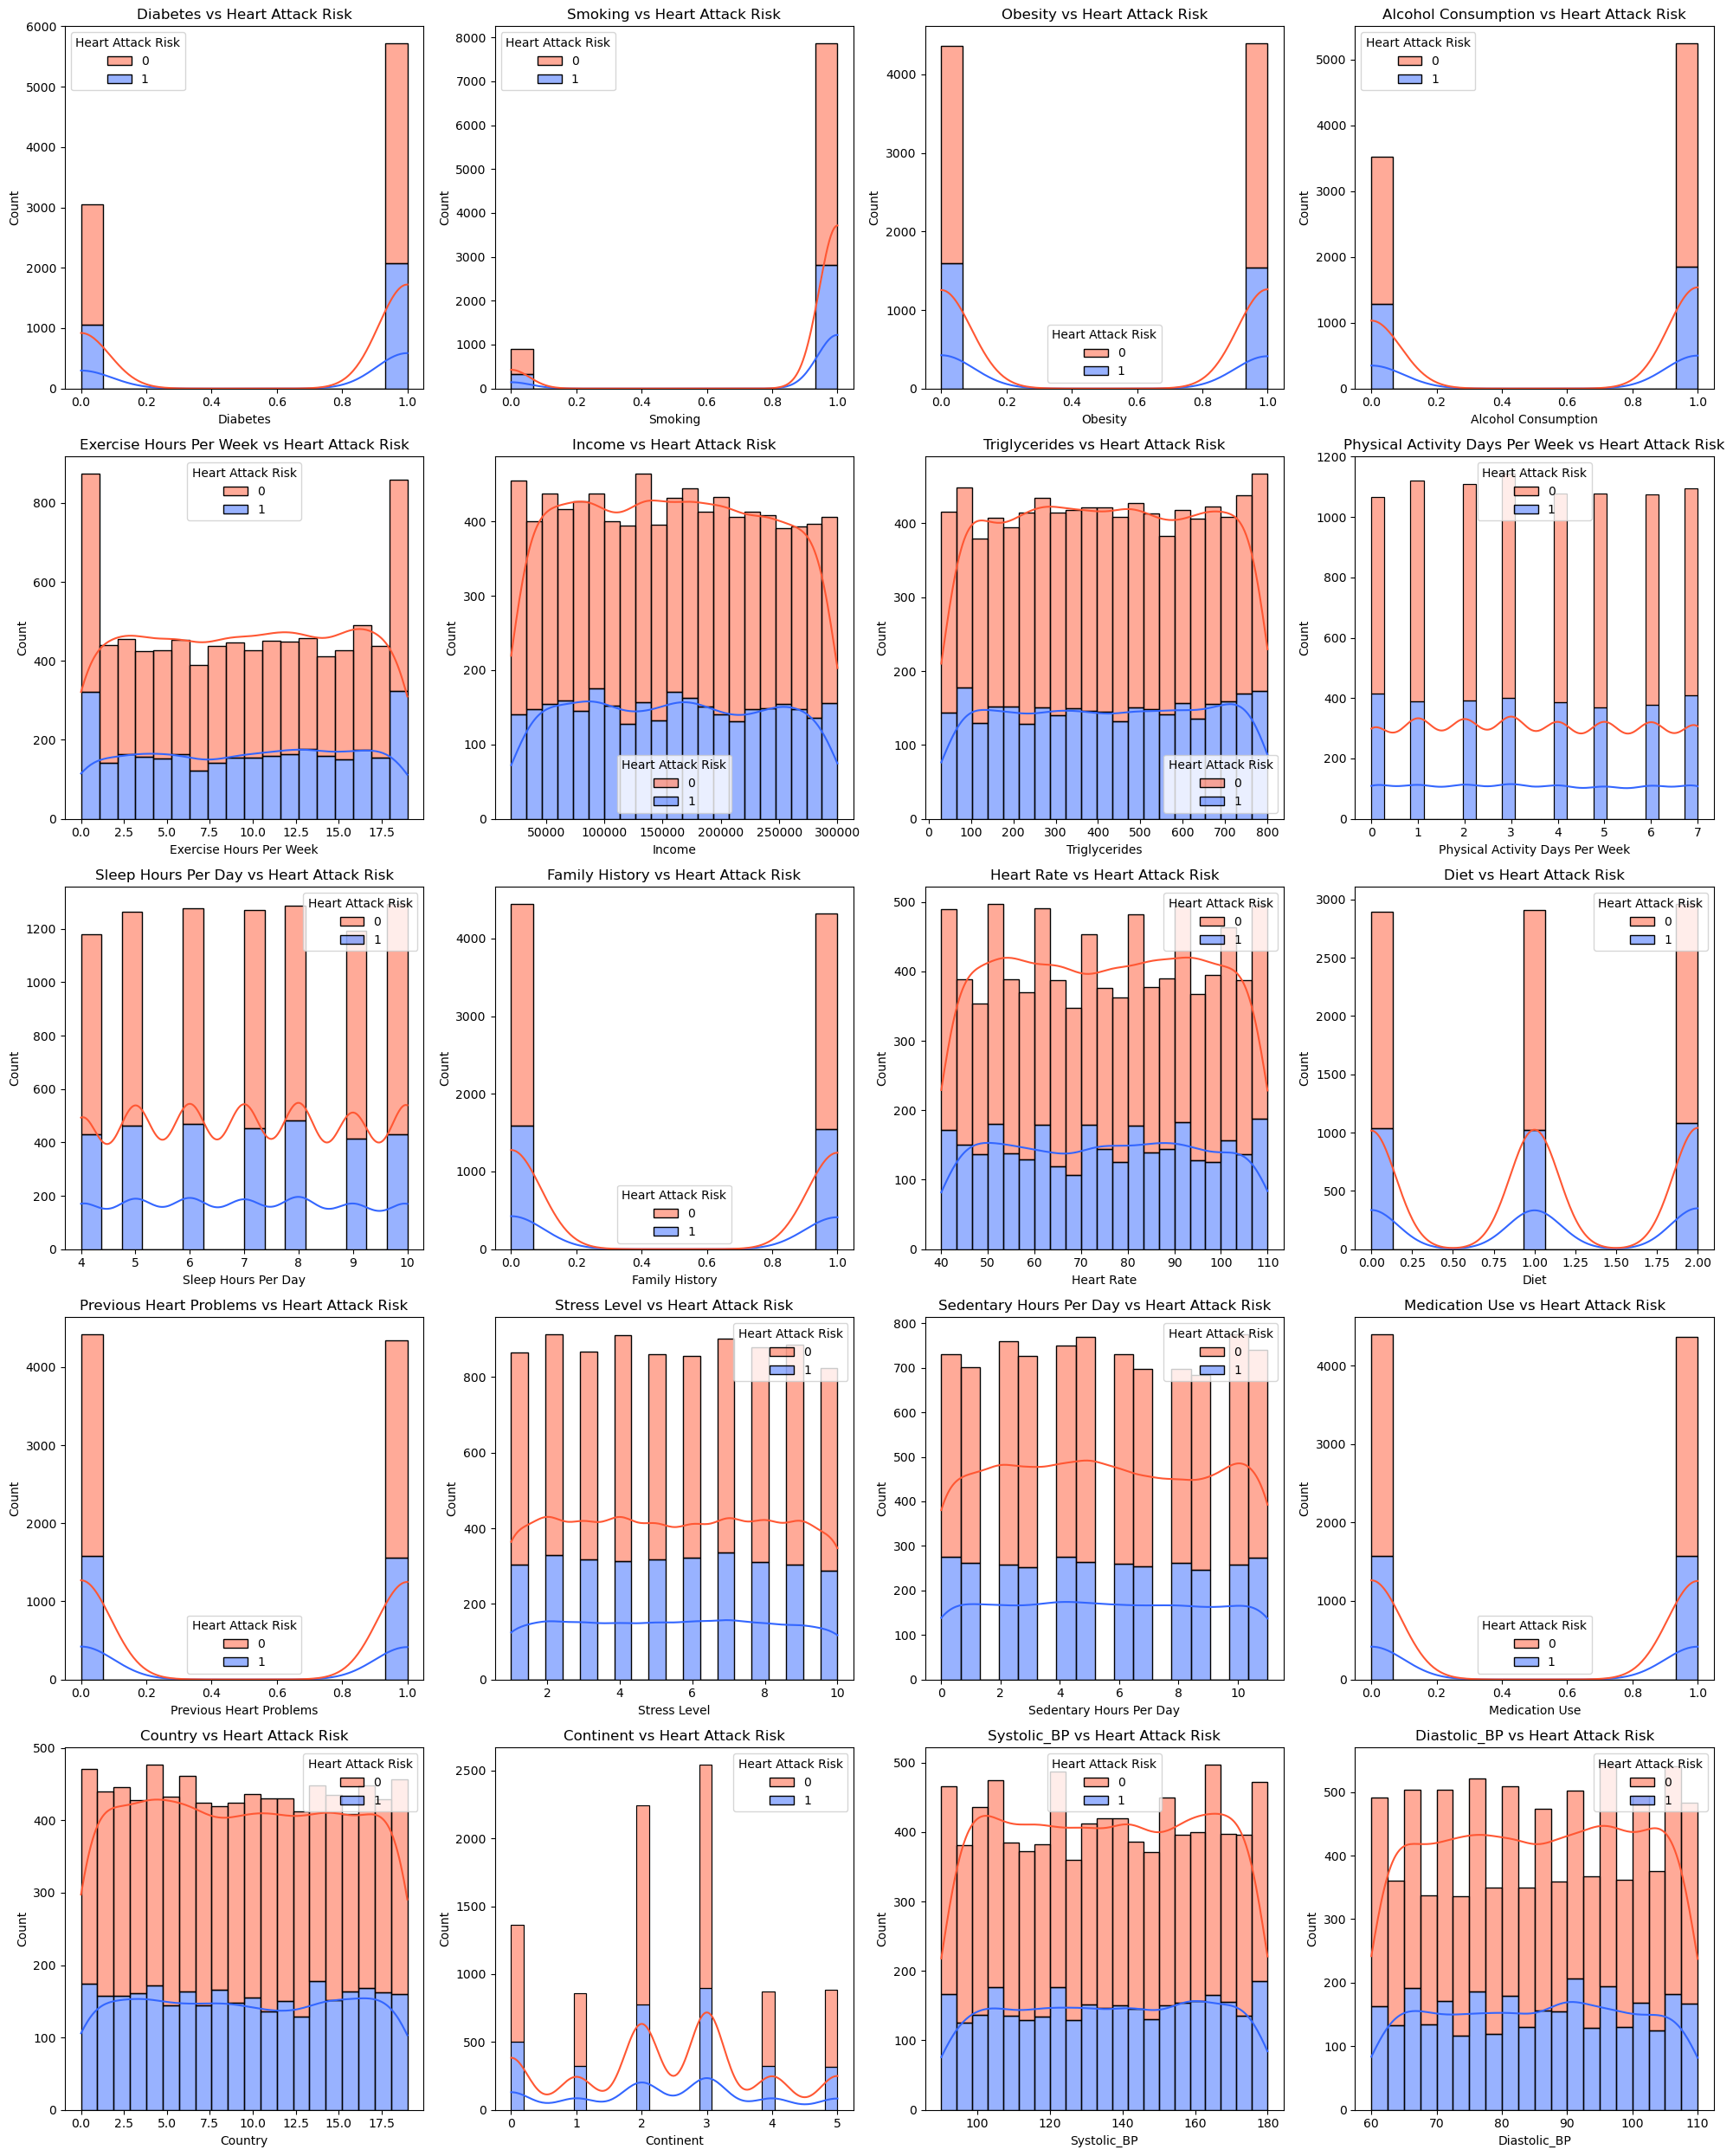

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Задаем цвета
custom_colors = ["#FF5733", "#3366FF", "#33FF57", "#FF33FF", "#FFFF33", "#33FFFF"]

# Создаем подграфики
fig, axes = plt.subplots(5, 4, figsize=(20, 25))

# Список признаков
features = ['Diabetes', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 
            'Income', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 
            'Family History', 'Heart Rate', 'Diet', 'Previous Heart Problems', 'Stress Level', 
            'Sedentary Hours Per Day', 'Medication Use', 'Country', 'Continent', 'Systolic_BP', 
            'Diastolic_BP']

# Целевая переменная
target = 'Heart Attack Risk'

# Визуализируем каждый признак на отдельном подграфике
for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    sns.histplot(data=df, x=feature, hue=target, multiple='stack', palette=custom_colors, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs {target}')

plt.tight_layout()
plt.show()


2. Обучение базовых моделей

In [33]:
# Определение моделей
models = {'Logistic_Regression':LogisticRegression(random_state=42, class_weight='balanced'),
          'Random_Forest':RandomForestClassifier(random_state=42, class_weight='balanced'),
         'XGBoost':xgb.XGBClassifier(),
          'SVM':SVC(random_state=42, class_weight='balanced', kernel = 'rbf'), 
          'KNN':KNeighborsClassifier(),
          'Naive_Bayes':GaussianNB(),
          'Catboost':CatBoostClassifier(verbose=0)
          
          }

In [34]:
# Обучение моделей и оценка их точности и полноты
for i in models:
    obj = models[i]
    obj.fit(X_train_scaled, y_train)
    obj_pred = obj.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, obj_pred)
    precision = precision_score(y_test, obj_pred, zero_division=1)
    print('Accuracy of ' + i + ': ', accuracy)
    print('Precision of ' + i + ': ', precision)

Accuracy of Logistic_Regression:  0.4906808672499049
Precision of Logistic_Regression:  0.3457653457653458
Accuracy of Random_Forest:  0.6405477367820464
Precision of Random_Forest:  0.43478260869565216
Accuracy of XGBoost:  0.5922403955876759
Precision of XGBoost:  0.3800738007380074
Accuracy of SVM:  0.5100798782807151
Precision of SVM:  0.3516295025728988
Accuracy of KNN:  0.5659946747812856
Precision of KNN:  0.34231378763866877
Accuracy of Naive_Bayes:  0.6416888550779765
Precision of Naive_Bayes:  1.0
Accuracy of Catboost:  0.6337010270064664
Precision of Catboost:  0.4146341463414634


In [35]:
# Создание новых признаков
df['High_Triglycerides'] = df['Triglycerides'].apply(lambda x: 1 if 250 <= x <= 800 else 0)
df['High_Cholesterol'] = df['Cholesterol'].apply(lambda x: 1 if 250 <= x <= 400 else 0)
df['High_Systolic_BP']= df['Systolic_BP'].apply(lambda x: 1 if 141 <= x <= 180 else 0)
df['High_Diastolic_BP']= df['Diastolic_BP'].apply(lambda x: 1 if 91 <= x <= 110 else 0)
df['High_BMI']= df['BMI'].apply(lambda x: 1 if 30 <= x <= 39 else 0)
df['High_Diabetes'] = df['Diabetes'].apply(lambda x: 1 if x == 1 else 0)

In [36]:
# Разделение обновленных данных(с новыми признаками) на признаки и целевую переменную
features = ['Age', 'Sex', 'Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Income', 'BMI',
            'Triglycerides', 'Country', 'Continent', 'Systolic_BP', 'Diastolic_BP',
            'High_Triglycerides', 'High_Cholesterol', 'High_Systolic_BP', 'High_Diastolic_BP',
            'High_BMI', 'High_Diabetes']
X = df[features]
y = df['Heart Attack Risk']

In [37]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [38]:
# Определение модели KNN
knn = KNeighborsClassifier(n_neighbors=2)

# Параметры для GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

# Настройка гиперпараметров с использованием GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и их значений
print("Наилучшие параметры: ", grid_search.best_params_)
print("Наилучшее значение accuracy: ", grid_search.best_score_)

Наилучшие параметры:  {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
Наилучшее значение accuracy:  0.6266711004996833


In [40]:
from sklearn.metrics import classification_report, confusion_matrix
# Использование наилучшей модели для предсказаний
best_knn_model = grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, zero_division=1)
print('RandomForest Accuracy: ', accuracy_knn)
print('RandomForest Precision: ', precision_knn)
print("RandomForest Classification Report:\n", classification_report(y_test, y_pred_knn))
print("RandomForest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

RandomForest Accuracy:  0.6298972993533662
RandomForest Precision:  0.3945578231292517
RandomForest Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.95      0.77      1687
           1       0.39      0.06      0.11       942

    accuracy                           0.63      2629
   macro avg       0.52      0.50      0.44      2629
weighted avg       0.55      0.63      0.53      2629

RandomForest Confusion Matrix:
 [[1598   89]
 [ 884   58]]


In [43]:
# Определение модели RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini'],
    'max_features' : ['log2'],
    'class_weight': ['balanced']
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Вывод наилучших параметров и результатов
print("Наилучшие параметры для RandomForest:", grid_search_rf.best_params_)
print("Наилучшее значение accuracy для RandomForest:", grid_search_rf.best_score_)

Наилучшие параметры для RandomForest: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Наилучшее значение accuracy для RandomForest: 0.6379195135019431


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score
# Оценка модели RandomForest
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=1)
print('RandomForest Accuracy: ', accuracy_rf)
print('RandomForest Precision: ', precision_rf)
print("RandomForest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("RandomForest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

RandomForest Accuracy:  0.6356028908330164
RandomForest Precision:  0.35714285714285715
RandomForest Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.98      0.78      1687
           1       0.36      0.02      0.04       942

    accuracy                           0.64      2629
   macro avg       0.50      0.50      0.41      2629
weighted avg       0.54      0.64      0.51      2629

RandomForest Confusion Matrix:
 [[1651   36]
 [ 922   20]]


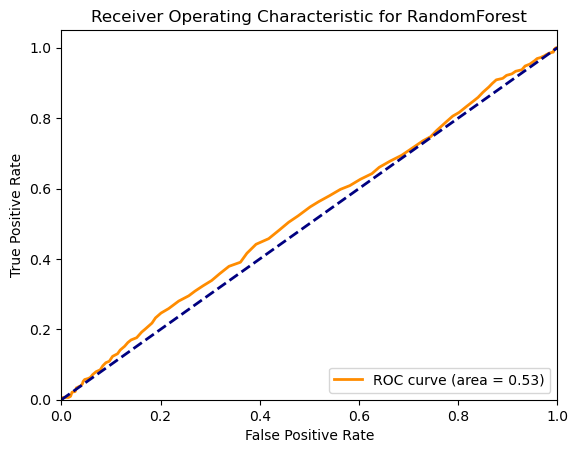

In [46]:
# ROC и AUC для RandomForest
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RandomForest')
plt.legend(loc="lower right")
plt.show()

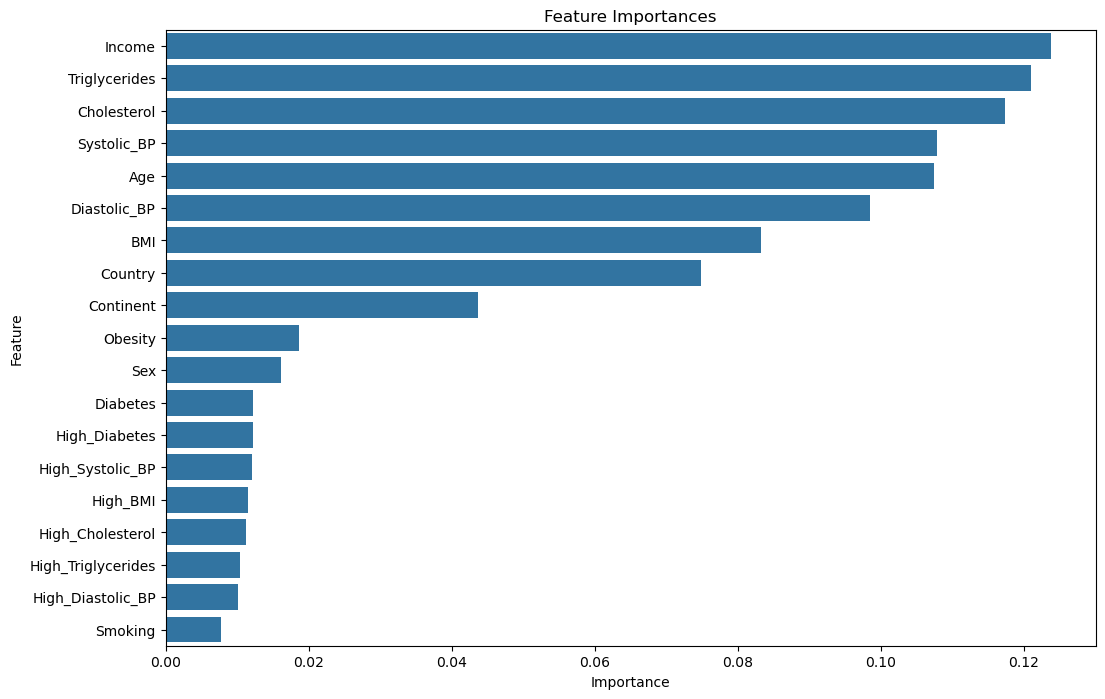

In [47]:
# Оценка важности признаков
feature_importances = best_rf.feature_importances_
feature_names = X.columns

# Создание DataFrame для важности признаков
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()

In [49]:
# Определение модели CatBoost
catboost_model = CatBoostClassifier(verbose=0)

# Параметры для GridSearchCV
param_grid = {
    'iterations': [100, 200, 500],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Настройка гиперпараметров с использованием GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и их значений
print("Наилучшие параметры: ", grid_search.best_params_)
print("Наилучшее значение accuracy: ", grid_search.best_score_)

Наилучшие параметры:  {'depth': 8, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.01}
Наилучшее значение accuracy:  0.6421585749214112


In [50]:
# Оценка модели CatBoost
best_catboost_model = grid_search.best_estimator_
y_pred_cb = best_catboost_model.predict(X_test)

accuracy_cb = accuracy_score(y_test, y_pred_cb)
precision_cb = precision_score(y_test, y_pred_cb, zero_division=1)
print('Сatboost Accuracy: ', accuracy_cb)
print('Catboost Precision: ', precision_cb)
print("Сatboost Classification Report:\n", classification_report(y_test, y_pred_cb))
print("Сatboost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cb))

Сatboost Accuracy:  0.6416888550779765
Catboost Precision:  1.0
Сatboost Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1687
           1       0.00      0.00      0.00       942

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629

Сatboost Confusion Matrix:
 [[1687    0]
 [ 942    0]]


c:\Users\user\miniconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\miniconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\miniconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

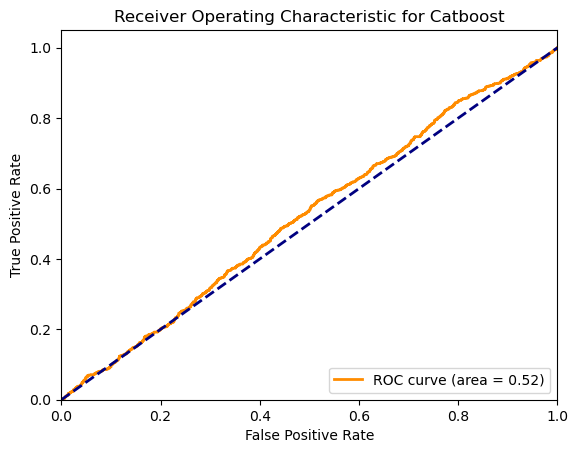

In [51]:
# ROC и AUC для CatBoost
y_pred_proba_cb = best_catboost_model.predict_proba(X_test)[:, 1]
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_pred_proba_cb)
roc_auc_cb = auc(fpr_cb, tpr_cb)

plt.figure()
plt.plot(fpr_cb, tpr_cb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_cb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Catboost')
plt.legend(loc="lower right")
plt.show()

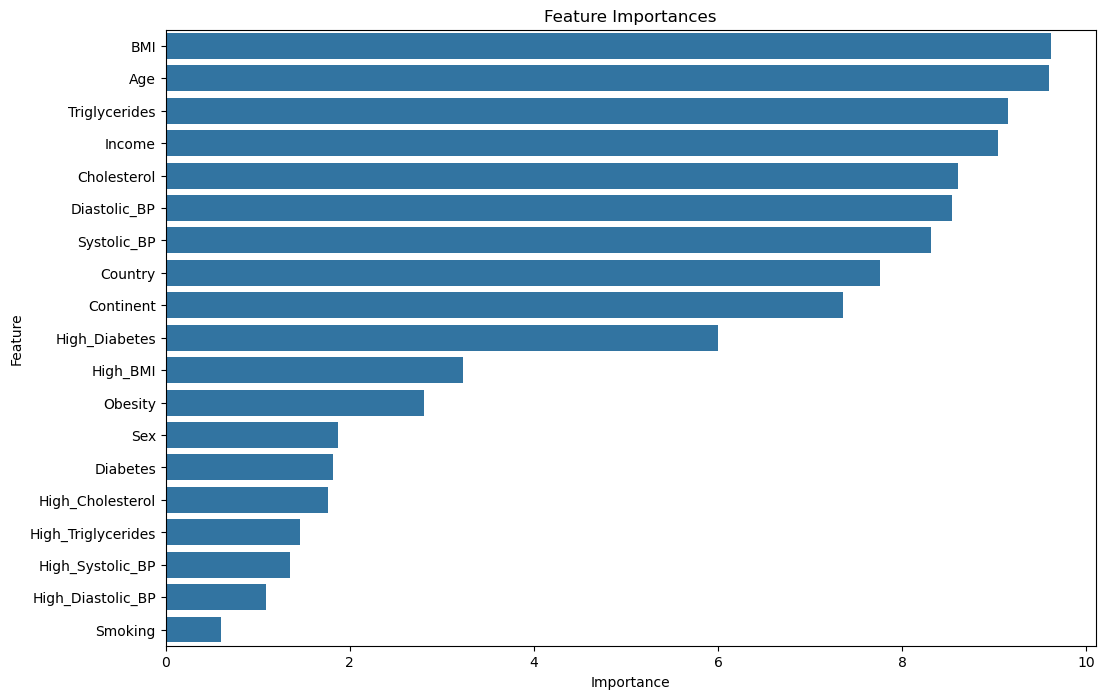

In [52]:
# Оценка важности признаков
feature_importances = best_catboost_model.feature_importances_
feature_names = X.columns

# Создание DataFrame для важности признаков
feature_importances_cb = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importances_cb = feature_importances_cb.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_cb)
plt.title('Feature Importances')
plt.show()

К важным признаком в 2х моделях (RandomForest и CatBoost) относятся: Доход, уровень холестерина, систолическое/диастолическое давление, уровень триглицеридов, ИМТ, страна, континент, возраст, ожирение.

Точность у обеих моделей слабая, плохо распознают 1 класс(наличие Heart attack), зато неплохо 0 класс
RandomForest Accuracy:  0.6356028908330164
RandomForest Precision:  0.35714285714285715

Сatboost Accuracy:  0.6416888550779765
Catboost Precision:  1.0

In [53]:
#модель Adaboost

# Определение модели AdaBoost
adaboost_model = AdaBoostClassifier()

# Параметры для GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 1]
}

# Настройка гиперпараметров с использованием GridSearchCV
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и их значений
print("Наилучшие параметры: ", grid_search.best_params_)
print("Наилучшее значение accuracy: ", grid_search.best_score_)

c:\Users\user\miniconda3\envs\tensorflow_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Наилучшие параметры:  {'learning_rate': 0.01, 'n_estimators': 50}
Наилучшее значение accuracy:  0.6410181677125898


In [54]:
# Использование наилучшей модели для предсказаний
best_adaboost_model = grid_search.best_estimator_
y_pred_ab = best_adaboost_model.predict(X_test)
# Оценка метрик
accuracy_ab = accuracy_score(y_test, y_pred_ab)
precision_ab = precision_score(y_test, y_pred_ab,zero_division=1)

print(f"AdaBoost Accuracy: {accuracy_ab}")
print(f"AdaBoost Precision: {precision_ab}")
print(f"AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ab))
print(f"AdaBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ab))


AdaBoost Accuracy: 0.6416888550779765
AdaBoost Precision: 1.0
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1687
           1       0.00      0.00      0.00       942

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629

AdaBoost Confusion Matrix:
 [[1687    0]
 [ 942    0]]


c:\Users\user\miniconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\miniconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\miniconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

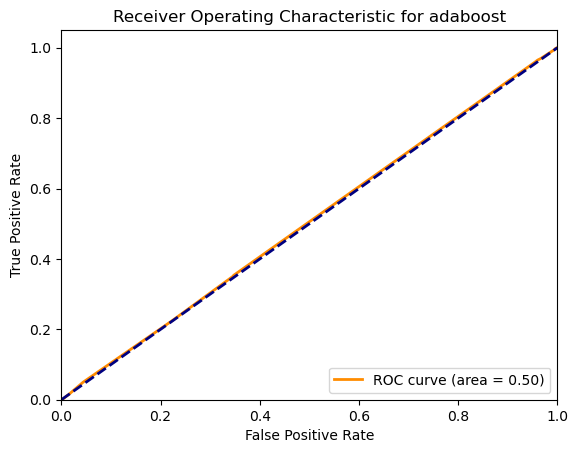

In [55]:
# ROC и AUC для AdaBoost
y_pred_proba_ab = best_adaboost_model.predict_proba(X_test)[:, 1]
fpr_ab, tpr_ab, _ = roc_curve(y_test, y_pred_proba_ab)
roc_auc_ab = auc(fpr_ab, tpr_ab)

plt.figure()
plt.plot(fpr_ab, tpr_ab, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ab)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for adaboost')
plt.legend(loc="lower right")
plt.show()

AdaBoost вообще не распознает 1 класс. 
AdaBoost Accuracy: 0.6416888550779765
AdaBoost Precision: 1.0

In [56]:
import lightgbm as lgb
# Определение модели LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42, class_weight='balanced')

# Параметры для GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'boosting_type': ['gbdt', 'dart'],
    'min_child_samples': [20, 50, 100]
}

# Настройка гиперпараметров с использованием GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и их значений
print("Наилучшие параметры для LightGBM: ", grid_search.best_params_)
print("Наилучшее значение accuracy для LightGBM: ", grid_search.best_score_)

[LightGBM] [Info] Number of positive: 2197, number of negative: 3937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1033
[LightGBM] [Info] Number of data points in the train set: 6134, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Наилучшие параметры для LightGBM:  {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'min_child_samples': 20, 'n_estimators': 500, 'num_leaves': 100}
Наилучшее значение accuracy для LightGBM:  0.5725460408901478


In [77]:
# Использование наилучшей модели для предсказаний
best_lgb_model  = grid_search.best_estimator_
y_pred_lgb = best_lgb_model.predict(X_test)
# Оценка метрик
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb,zero_division=1)

print(f" LightGBM Accuracy: {accuracy_lgb}")
print(f"LightGBM Precision: {precision_lgb}")
print(f"LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))
print(f"LightGBM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))

 LightGBM Accuracy: 0.5899581589958159
LightGBM Precision: 0.3885245901639344
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.78      0.71      1687
           1       0.39      0.25      0.31       942

    accuracy                           0.59      2629
   macro avg       0.52      0.52      0.51      2629
weighted avg       0.56      0.59      0.56      2629

LightGBM Confusion Matrix:
 [[1314  373]
 [ 705  237]]


In [59]:
from sklearn.linear_model import LassoCV

# Применение LASSO для отбора признаков
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)
# Получение коэффициентов
lasso_coef = lasso.coef_

# Выбор значимых признаков
significant_features = X_train.columns[(lasso_coef != 0)]
X_train_selected = X_train[significant_features]
X_test_selected = X_test[significant_features]

print("Значимые признаки:", significant_features)

Значимые признаки: Index(['Income'], dtype='object')


In [60]:
from skopt import BayesSearchCV

# Определение модели для настройки гиперпараметров
rf_clf = RandomForestClassifier(random_state=42)

# Определение пространства поиска гиперпараметров
param_grid_rf = {
    'n_estimators': (50, 300),
    'max_depth': (5, 30, 50),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
}

# Bayesian Optimization с использованием BayesSearchCV
bayes_search_rf = BayesSearchCV(estimator=rf_clf, search_spaces=param_grid_rf, n_iter=32, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)
bayes_search_rf.fit(X_train, y_train)

# Вывод наилучших параметров и результатов
print("Наилучшие параметры для RandomForest:", bayes_search_rf.best_params_)
print("Наилучшее значение accuracy для RandomForest:", bayes_search_rf.best_score_)


Наилучшие параметры для RandomForest: OrderedDict([('criterion', 'entropy'), ('max_depth', 5), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 58)])
Наилучшее значение accuracy для RandomForest: 0.6419954237912334


In [61]:
# Использование наилучшей модели для предсказаний
best_rf_clf = bayes_search_rf.best_estimator_
y_pred_rf = best_rf_clf.predict(X_test)

# Оценка метрик
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=1)

print(f"RandomForest Accuracy: {accuracy_rf}")
print(f"RandomForest Precision: {precision_rf}")
print(f"RandomForest Classification Report:\n", classification_report(y_test, y_pred_rf))
print(f"RandomForest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

RandomForest Accuracy: 0.6416888550779765
RandomForest Precision: 1.0
RandomForest Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1687
           1       0.00      0.00      0.00       942

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629

RandomForest Confusion Matrix:
 [[1687    0]
 [ 942    0]]


c:\Users\user\miniconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\miniconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\miniconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [63]:
# Конечная модель
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('catboost', catboost_model),
        ('lightgbt', lgb_model)
    ],
    voting='soft'  
)

voting_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2197, number of negative: 3937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1033
[LightGBM] [Info] Number of data points in the train set: 6134, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x00000218997F19D0>),
                             ('lightgbt',
                              LGBMClassifier(class_weight='balanced',
                                             random_state=42))],
                 voting='soft')

In [64]:

y_pred_ensemble = voting_clf.predict(X_test)

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble, zero_division=1)

print(f"Ensemble Accuracy: {accuracy_ensemble}")
print(f"Ensemble Precision: {precision_ensemble}")
print(f"Ensemble Classification Report:\n", classification_report(y_test, y_pred_ensemble))
print(f"Ensemble Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))

Ensemble Accuracy: 0.6268543172308862
Ensemble Precision: 0.42105263157894735
Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.92      0.76      1687
           1       0.42      0.11      0.17       942

    accuracy                           0.63      2629
   macro avg       0.53      0.51      0.47      2629
weighted avg       0.57      0.63      0.55      2629

Ensemble Confusion Matrix:
 [[1544  143]
 [ 838  104]]


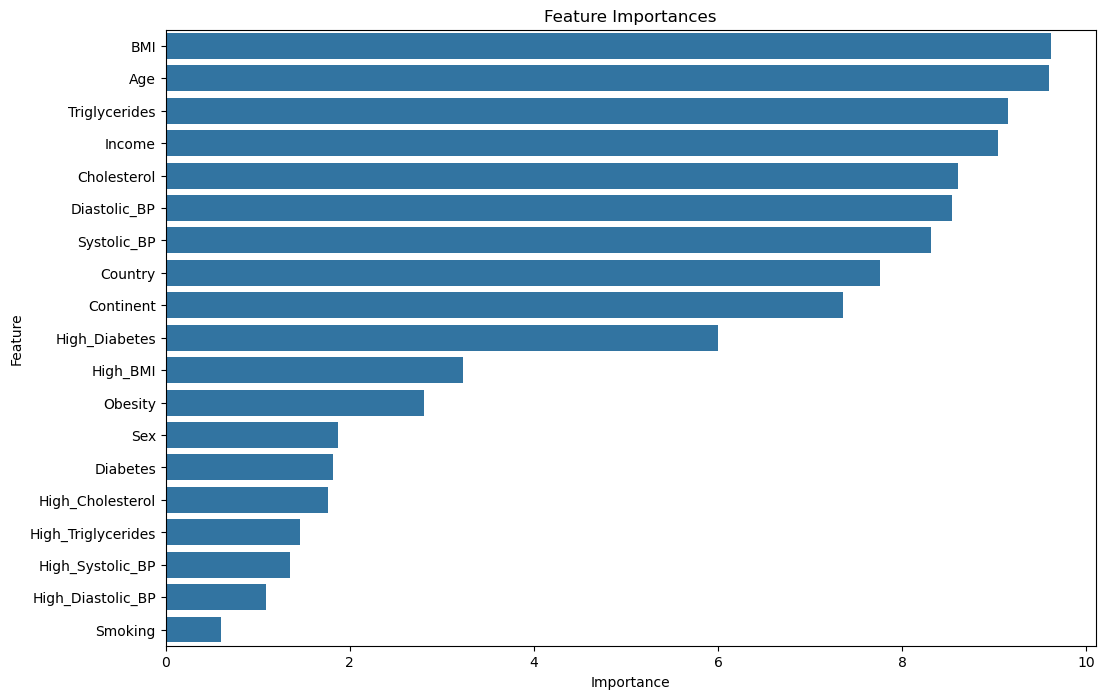

In [73]:
# Оценка важности признаков
feature_importances_rf_clf = best_rf_clf.feature_importances_
feature_names = X.columns

# Создание DataFrame для важности признаков
feature_importances_rf_clf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importances_rf_clf = feature_importances_rf_clf.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf_clf)
plt.title('Feature Importances')
plt.show()

метрики не сильно улучшились, модель лучше предсказывает людей, у которых нет риска ССЗ

In [74]:
import joblib

# Сохранение модели в файл
joblib.dump(voting_clf, 'voting_clf_model.pkl')

['voting_clf_model.pkl']

C:\Users\user\AppData\Local\Temp\ipykernel_10788\4014768528.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Cholesterol', palette='coolwarm', ax=axes[0])
C:\Users\user\AppData\Local\Temp\ipykernel_10788\4014768528.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Triglycerides', palette='coolwarm', ax=axes[1])
C:\Users\user\AppData\Local\Temp\ipykernel_10788\4014768528.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='BMI', palette='coolwarm', ax=axes[2])


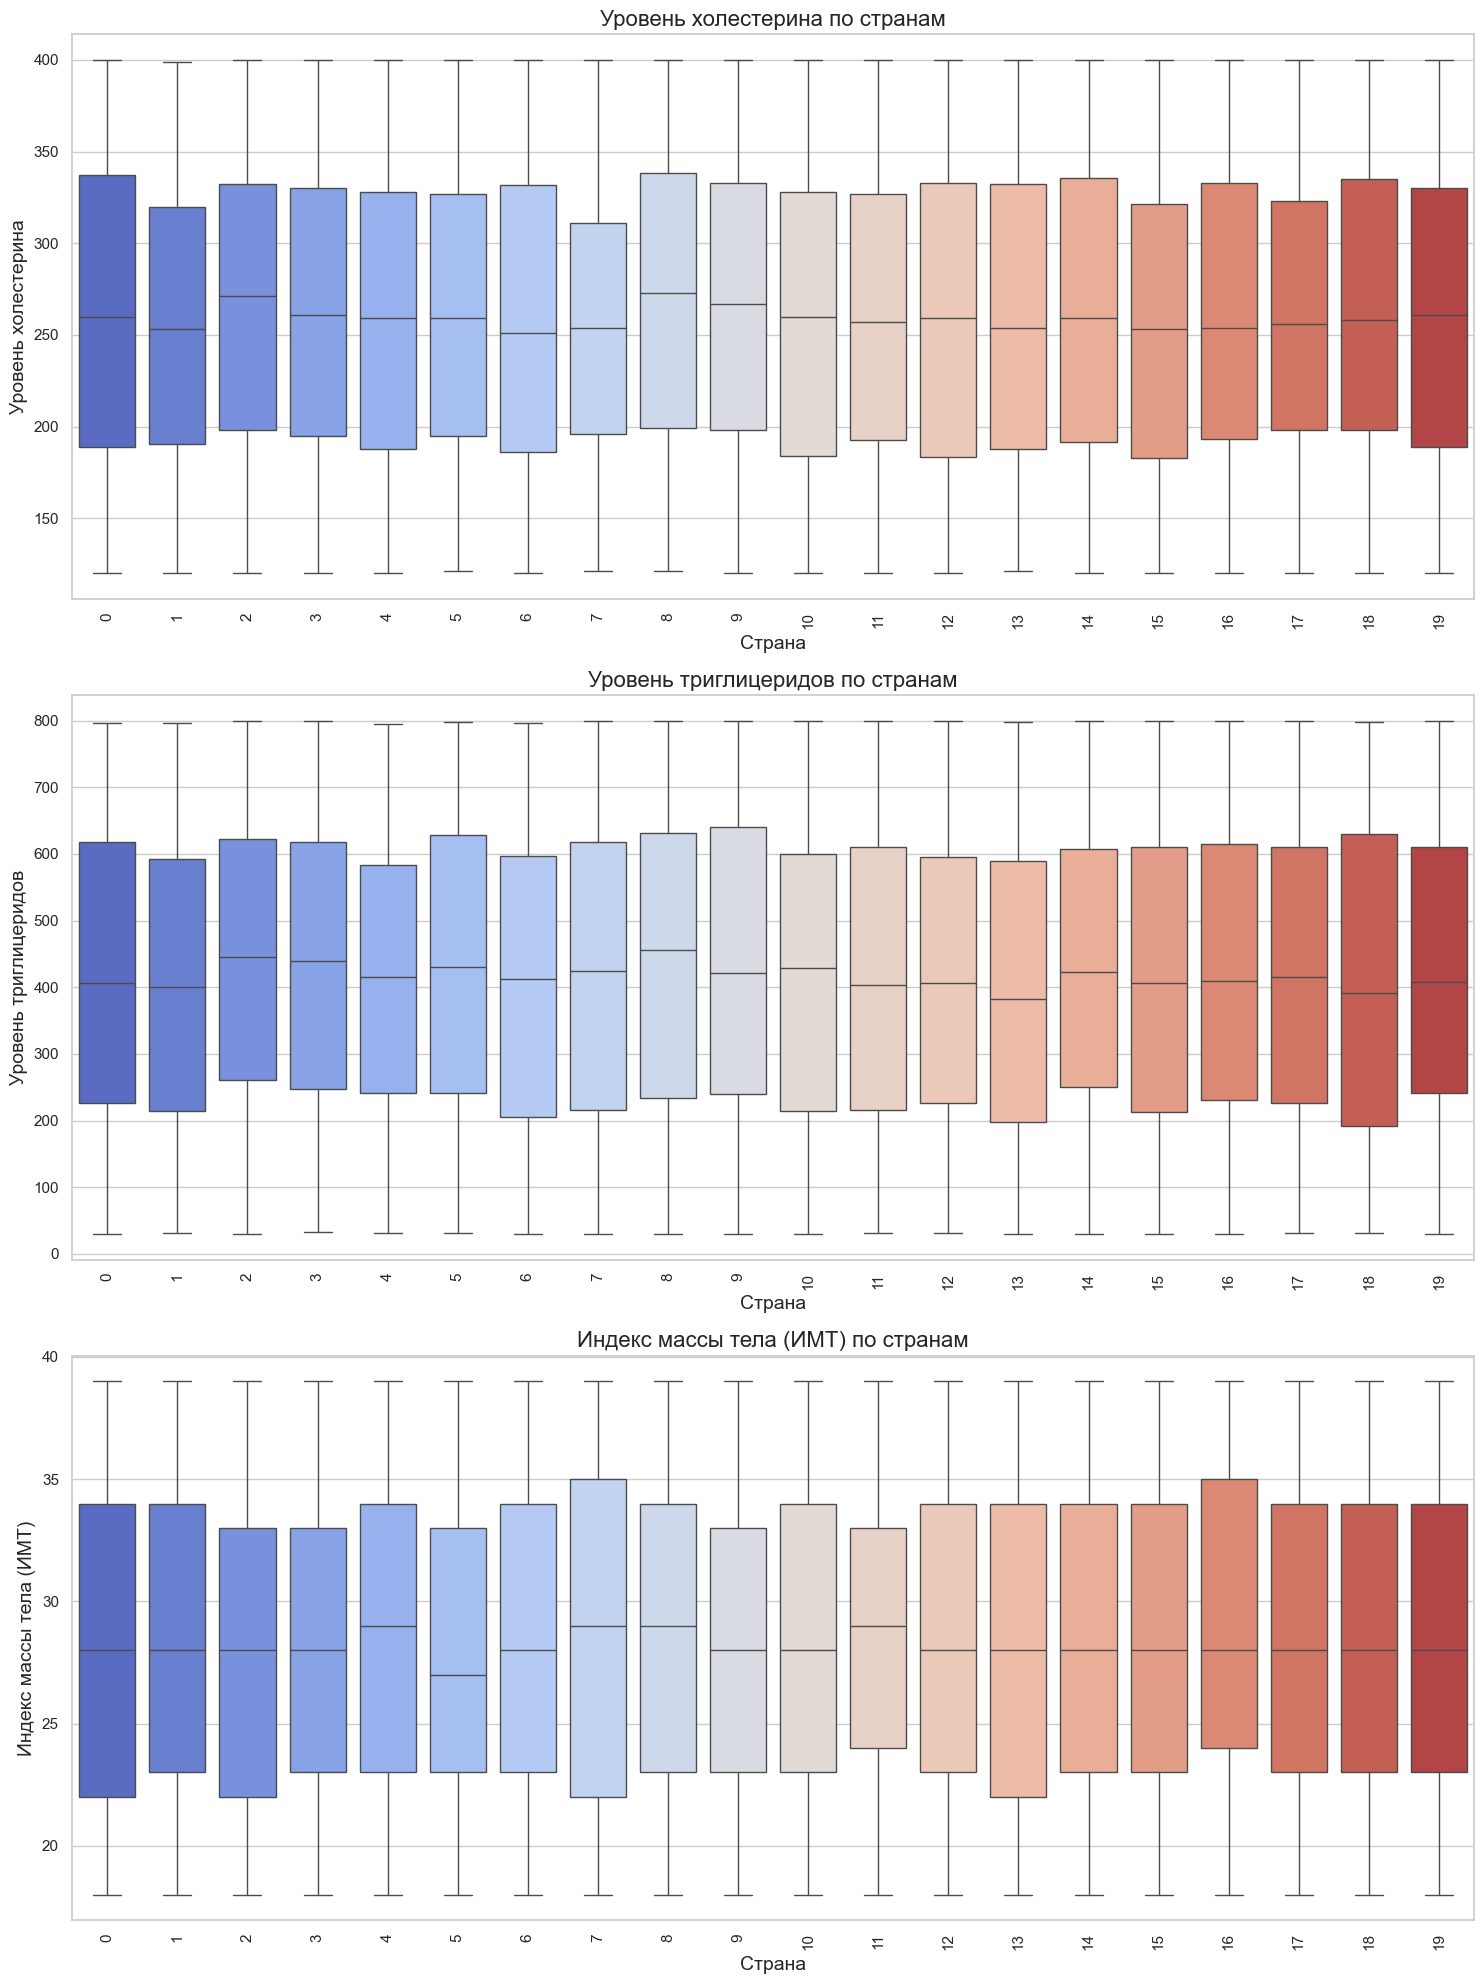

In [75]:

# Настройка стиля Seaborn
sns.set(style="whitegrid")

# Определение признаков
features = ['Cholesterol', 'Triglycerides', 'BMI']
feature_names = ['Уровень холестерина', 'Уровень триглицеридов', 'Индекс массы тела (ИМТ)']

# Создание графиков
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# Визуализация уровня холестерина по странам
sns.boxplot(data=df, x='Country', y='Cholesterol', palette='coolwarm', ax=axes[0])
axes[0].set_title('Уровень холестерина по странам', fontsize=16)
axes[0].set_xlabel('Страна', fontsize=14)
axes[0].set_ylabel('Уровень холестерина', fontsize=14)
axes[0].tick_params(axis='x', rotation=90)

# Визуализация уровня триглицеридов по странам
sns.boxplot(data=df, x='Country', y='Triglycerides', palette='coolwarm', ax=axes[1])
axes[1].set_title('Уровень триглицеридов по странам', fontsize=16)
axes[1].set_xlabel('Страна', fontsize=14)
axes[1].set_ylabel('Уровень триглицеридов', fontsize=14)
axes[1].tick_params(axis='x', rotation=90)

# Визуализация ИМТ по странам
sns.boxplot(data=df, x='Country', y='BMI', palette='coolwarm', ax=axes[2])
axes[2].set_title('Индекс массы тела (ИМТ) по странам', fontsize=16)
axes[2].set_xlabel('Страна', fontsize=14)
axes[2].set_ylabel('Индекс массы тела (ИМТ)', fontsize=14)
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Вывод:

В своей работе я пыталась прогнозировать сердечно-сосудистый риск из набора данных (8763 записей пациентов со всего мира).
Были выполнены шаги: - предобработка данных (включала в себя: кодирование категориальных переменных, создание новых признаков, нормализация);

                     - корреляция признаков (с помощью Phik matrix)

                     - создание базовых моделей: Logistic Regression, Random Forest, XGBoost, SVM, KNN, Naive Bayes, CatBoost;

                     - настройка гиперпараметров моделей с помощью GridSearchCV

                     - оценка моделей 

Предсказательная способность всех моделей низкая:
1) RandomForest Accuracy:  0.6356028908330164
   RandomForest Precision:  0.35714285714285715

2) Сatboost Accuracy:  0.6416888550779765
   Catboost Precision:  1.0

3) AdaBoost Accuracy: 0.6416888550779765
   AdaBoost Precision: 1.0

4)  LightGBM Accuracy: 0.5899581589958159
    LightGBM Precision: 0.3885245901639344

5) Ensemble Accuracy: 0.6268543172308862
   Ensemble Precision: 0.42105263157894735

К важным признакам относятся: доход, уровень холестерина, систолическое/диастолическое давление, уровень триглицеридов, ИМТ, страна, континент, возраст, ожирение.

Заключение:

В данной работе проведен комплексный анализ и прогнозирование риска сердечных заболеваний на основе различных характеристик пациентов.
Несмотря на сложности с предсказанием положительного класса, работа продемонстрировала важность предварительной обработки данных, создания новых признаков и использования различных моделей для достижения лучших результатов.
В будущем можно рассмотреть использование дополнительных методов балансировки классов, а также исследовать другие алгоритмы и подходы для улучшения точности предсказаний.


                     